In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\CPI\AWESOME_V1(1 Sheet).csv",encoding='ISO-8859-1')

# Explore the dataset
print(df.head())
print(df.info())


   Sort_ID  Entry_date  Study_number  Author  Duplicate_record Quality_flag  \
0        1  2020-01-11             1  Cantón               NaN       Q1, Q4   
1        2  2020-01-11             1  Cantón               NaN       Q1, Q4   
2        3  2020-01-11             1  Cantón               NaN       Q1, Q4   
3        4  2020-01-11             1  Cantón               NaN       Q1, Q4   
4        5  2020-01-11             1  Cantón               NaN       Q1, Q4   

  Contributor Checker Country            Region  ... Runoff_max  \
0          JJ      XD   Spain  Almería Province  ...        NaN   
1          JJ      XD   Spain  Almería Province  ...        NaN   
2          JJ      XD   Spain  Almería Province  ...        NaN   
3          JJ      XD   Spain  Almería Province  ...        NaN   
4          JJ      XD   Spain  Almería Province  ...        NaN   

  Runoff_max_day  Leaching  Leaching_unit  Leaching_type  Data_source  \
0            NaN       NaN            NaN        

In [4]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None) 
df.isnull().sum()

Sort_ID                  0
Entry_date               0
Study_number             0
Author                   0
Duplicate_record      5277
Quality_flag          2212
Contributor              0
Checker                  3
Country                  6
Region                 120
Site_name             3047
Site_ID                  0
Paper_year               0
Study_midyear         2105
YearsOfData            172
Annual_coverage        778
Latitude               184
Longitude              184
Elevation             3709
MAT                   3757
MAP                   1695
MPET                  5139
Study_temp            5183
Study_precip          3655
Manipulation          2993
Manipulation_level    3456
Manipulation_age      4925
IGBP                  1301
Ecosystem_age         5116
Species               3043
Leaf_habit            3656
Ecosystem_state       3503
LAI                   5259
Soil_family           3545
Soil_texture          3603
Soil_sand             4210
Soil_silt             4236
S

In [5]:
df.shape

(5288, 87)

In [17]:
df_interpolate=df.interpolate(method='nearest')
final_df=df_interpolate.dropna(subset=['MAT', 'MAP', 'Elevation', 'Latitude', 'Longitude', 'Slope', 'Soil_sand', 'Soil_silt', 'Soil_clay','Soil_SOC'])

C:\Users\HP\AppData\Local\Temp\ipykernel_14196\1611893517.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolate=df.interpolate(method='nearest')


In [20]:
X = final_df[['MAT', 'MAP', 'Elevation', 'Latitude', 'Longitude', 'Slope', 'Soil_sand', 'Soil_silt', 'Soil_clay']]  # Add relevant features
y = final_df['Soil_SOC']  # The target variable
X.isnull().sum()

MAT          0
MAP          0
Elevation    0
Latitude     0
Longitude    0
Slope        0
Soil_sand    0
Soil_silt    0
Soil_clay    0
dtype: int64

In [23]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Step 1: Initial Model with Random Forest
rf_model = RandomForestRegressor(random_state=42,warm_start=True)
rf_model.fit(X_train_scaled, y_train)

# Step 2: Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Step 3: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Initial Mean Squared Error: {mse}")
print(f"Initial R²: {r2}")


Initial Mean Squared Error: 0.30717608701544297
Initial R²: 0.9025082768994774


In [31]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -------------- ------------------------- 163.8/456.1 kB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 245.8/456.1 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Optimized Mean Squared Error: 0.3117002380584167
Optimized R²: 0.9010723992404058


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_14196\1044806910.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns[indices], y=importances[indices], palette='viridis')


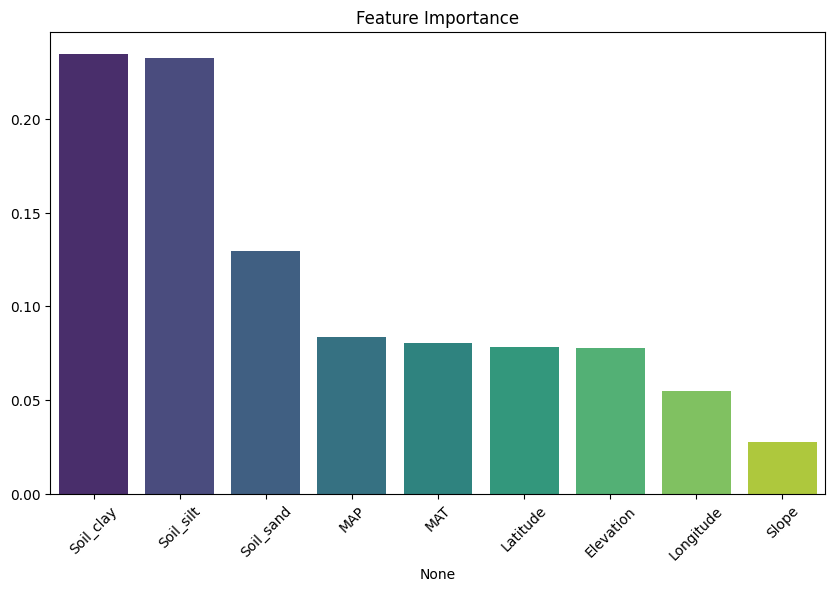

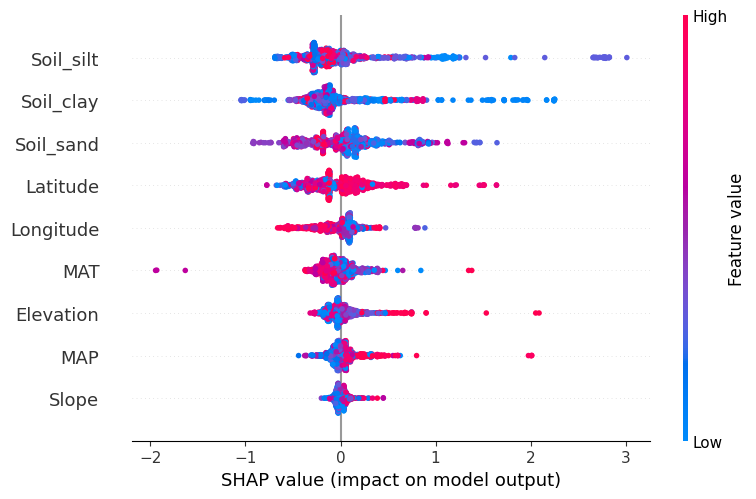

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np

# Step 4: Hyperparameter Tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# RandomizedSearchCV with fewer iterations (n_iter=10)
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42, warm_start=True),
                                   param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)

random_search.fit(X_train_scaled, y_train)

# Best Parameters from Randomized Search
print("Best Parameters:", random_search.best_params_)

# Step 5: Train the model with optimal hyperparameters
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions with the optimized model
y_pred_optimized = best_rf_model.predict(X_test_scaled)

# Step 7: Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R²: {r2_optimized}")

# Step 8: Feature Importance Visualization
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(x=X.columns[indices], y=importances[indices], palette='viridis')
plt.xticks(rotation=45)
plt.show()

# Optional: SHAP Values for Model Explanation
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


      Actual_SOC  Predicted_SOC  Erosion_Risk_Prediction  Actual_Erosion_Risk
2291      2.4418       2.440664                        0                    0
3993      0.8700       0.874126                        1                    1
4151      3.7700       3.770000                        0                    0
4380      1.1600       1.159195                        1                    1
4002      0.8700       0.965918                        1                    1
Confusion Matrix:
 [[364  20]
 [ 16 653]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       384
           1       0.97      0.98      0.97       669

    accuracy                           0.97      1053
   macro avg       0.96      0.96      0.96      1053
weighted avg       0.97      0.97      0.97      1053



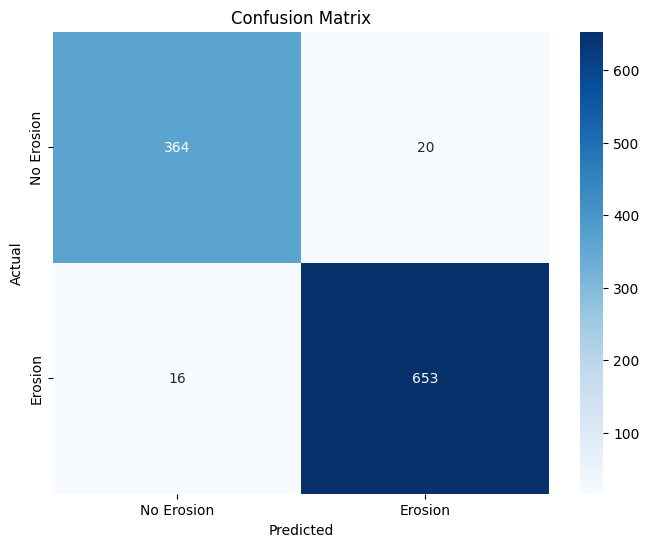

In [33]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 9: Define the threshold for SOC
threshold = 2.0  # Example threshold value in percentage

# Step 10: Classify predictions based on the threshold
y_pred_classes = np.where(y_pred_optimized < threshold, 1, 0)  # 1 indicates risk of erosion, 0 indicates no risk

# Step 10.1: Create a ground truth column based on the same threshold for simulated erosion risk
# Since you don't have actual erosion risk labels, we'll use the same threshold to create them
y_true_classes = np.where(y_test < threshold, 1, 0)  # Ground truth (simulated)

# Create a DataFrame to compare predictions and actual values
results_df = pd.DataFrame({
    'Actual_SOC': y_test,
    'Predicted_SOC': y_pred_optimized,
    'Erosion_Risk_Prediction': y_pred_classes,
    'Actual_Erosion_Risk': y_true_classes  # Simulated ground truth
})

print(results_df.head())

# Step 11: Evaluate classification results
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", class_report)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Erosion', 'Erosion'], yticklabels=['No Erosion', 'Erosion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [34]:
X_train.shape

(4208, 9)

In [35]:
X_test.shape

(1053, 9)